In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

In [2]:
def plot2D(x, y, p, xrange, yrange):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, xrange)
    ax.set_ylim(0, yrange)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [3]:
def laplace2d(p, x, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    icount = 0
    X, Y = np.meshgrid(x, y)
    zarray = np.zeros((len(x), len(y), 1132))
   
    f = lambda X,Y,p : p

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        #p[:, 0] = 0  # p = 0 @ x = 0
        #p[:, -1] = y  # p = y @ x = 2
        p[:, 0] = -1.0*np.cos((y-0.5)*np.pi)  
        p[:, -1] = np.cos((y-0.5)*np.pi)
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        
        #### Here is where we should update the plot animation       
        zarray[:,:,icount] =  f(X,Y,p)
        ####
        
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
        icount = icount + 1
     
    print ("Number of iterations = ",icount)
    return p, zarray

In [4]:
##variable declarations
xrange = 2
yrange = 1

nx = 31
ny = 31
c = 1
dx = xrange / (nx - 1)
dy = yrange / (ny - 1)

##initial conditions
p = np.zeros((ny, nx))  # create a XxY vector of 0's

##plotting aids
x = np.linspace(0, xrange, nx)
y = np.linspace(0, yrange, ny)
X, Y = np.meshgrid(x, y)

##boundary conditions
#p[:, 0] = 0  # p = 0 @ x = 0
#p[:, -1] = y  # p = y @ x = 2
p[:, 0] = -1.0*np.cos((y-0.5)*np.pi)  
p[:, -1] = np.cos((y-0.5)*np.pi)

p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1




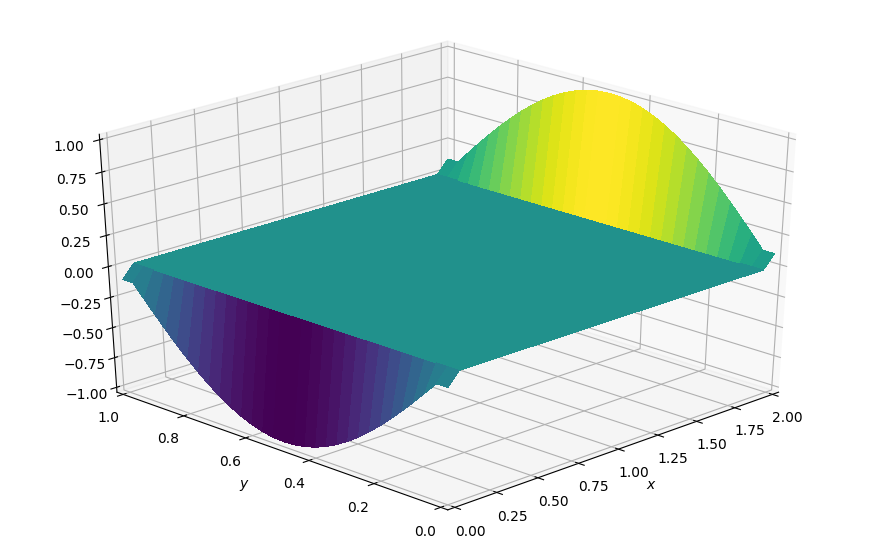

In [5]:
plot2D(x, y, p, xrange, yrange)

In [6]:
p, zarray = laplace2d(p, x, y, dx, dy, 1e-3)

Number of iterations =  325


In [ ]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')

fps = 60

plot = [ax.plot_surface(X, Y, zarray[:,:,0], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)]
ax.set_zlim(0,1.1)
ax.set_xlim(0, xrange)
ax.set_ylim(0, yrange)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
    
ani = animation.FuncAnimation(fig, update_plot, 393, fargs=(zarray, plot), interval=1000/fps)

ani.save('Laplace_animation.mp4', fps=fps)

In [ ]:
plot2D(x, y, p, xrange, yrange)